In [32]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

import sys 
sys.path.append('..')
import matplotlib
import mglearn
import os

from preamble import *

from matplotlib.pyplot import rc
rc('font',family='New Gulim') #plot 한글폰트 적용

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

### 3.4.2 NMF (음수 미포함 행렬 분해)

### 인공 데이터에 NMF 적용하기

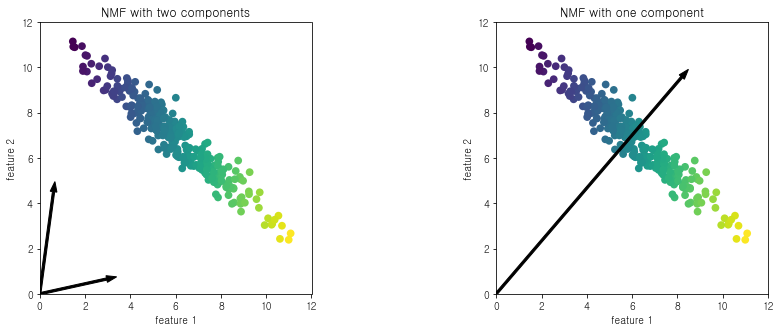

In [33]:
mglearn.plots.plot_nmf_illustration()

### 얼굴 이미지에 NMF 적용하기

In [46]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [47]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[70.      , ..., 18.666666],
       ...,
       [96.333336, ..., 72.      ]], dtype=float32), 
array([[ 55.333332, ...,  32.666668],
       ...,
       [ 44.333332, ..., 225.33333 ]], dtype=float32))


IndexError: index 436 is out of bounds for axis 1 with size 436

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))